# INF4480 Spring of 2021 - Project 1
### By Olav Fønstelien
<br>

### Notes:
* Implementation in Python using NumPy, SciPy, matplotlib
* Generating slides from Jupyter Lab, which is a first for me, so please don't be too strict!

We begin by setting up the Python environment

In [32]:
### Setting up environment
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Setting plotting style
plt.style.use('fivethirtyeight')
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Assignment 1 - Random variables

Let's first define some variables and functions to be used in the assignment.

In [33]:
# Defining some variables
N = 10000
bins = 100

In [34]:
# Normal distribution scaled for histogram representation
def scaled_norm(bin_edges, mean, std):
    bins = bin_edges.size - 1
    left_edges, right_edges = bin_edges[:-1], bin_edges[1:]
    diffs = stats.norm.cdf(right_edges, mean, std) - stats.norm.cdf(left_edges, mean, std)
    return diffs*bins

In [35]:
# Make array with values centered in each bin
def bin_centers(bin_edges):
    left_edges, right_edges = bin_edges[:-1], bin_edges[1:]
    centers = (left_edges + right_edges)/2
    return centers

### 1.1 Random variables - uniform PDF

In this assignment we will see how the uniform distribution can be regenerated by drawing random samples from it. The uniform distribution $\mathcal{U}(0,1)$ is given by
\begin{equation}
f_x (\alpha) = \bigg\{
    \begin{aligned}
    &1 \quad \text{if} \quad 0 \le \alpha \le 1 \\
    &0 \quad \text{otherwise}
    \end{aligned}
\end{equation}

The mean $\mu_x$ is given by
\begin{equation}
\mu_x = \int _{-\infty}^{\infty} f_x (\alpha) d \alpha = \int _{0}^{1} 1 d \alpha = \frac{1}{2} \quad ,
\end{equation}

while the variance $\sigma_x^2$ is given by
\begin{equation}
\sigma_x^2 = \int _{-\infty}^{\infty} [\alpha - \mu_x]^2 f_x (\alpha) d \alpha = \frac{1}{3} - \frac{1}{2} + \frac{1}{4} = \frac{1}{12} \approx 0.08333...
\end{equation}

To see how these statistical properties can be calculated from randomly drawn samples, we will begin by collecting a some thousand samples in a vector:

In [36]:
# Draw N samples from the uniform distribution in the range [0,1]
arr = np.random.rand(N)

Then we estimate the mean and variance, and compare with the true values 1/2 and 1/12:

In [37]:
# Extract the sample mean and variance
sample_mean = arr.mean()
sample_mean_err = abs(1/2 - sample_mean)/(1/2)*100
sample_var = arr.var()
sample_var_err = abs(1/12 - sample_var)/(1/12)*100
print(fr"sample mean = {sample_mean:.5f} (err = {sample_mean_err:.2}%)")
print(fr"sample variance = {sample_var:.5f} (err = {sample_var_err:.2}%)")

sample mean = 0.50142 (err = 0.28%)
sample variance = 0.08405 (err = 0.87%)


We can plot the estimated (discrete) PDF by drawing a line between the count number $f_x [\alpha]$ for each bin, and we can calculate the CDF by rectangular integration over the sequence $f_x [\alpha]$  with step size $\Delta \alpha = 1/100$, such that:
\begin{equation}
s = \sum _{N} f_x [\alpha] \Delta \alpha = 1
\end{equation}
We begin by generating a histogram:

In [38]:
# Extract the histogram and normalize the bin counts to 1
counts, bin_edges = np.histogram(arr, bins=bins)
counts = counts/N*bins

We sum up to assert that the histogram has been generated correctly, before we plot the estimated and true PDFs:

In [109]:
# Numerical integration:
s = np.sum(counts*(1/bins))
print(f"Numerical integration over estimated PDF: s = {s:.5f}")

Numerical integration over estimated PDF: s = 1.00000


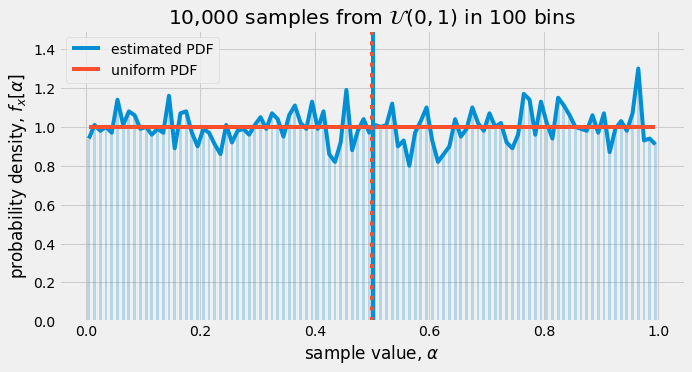

In [40]:
# Make plot

plt.figure(figsize=(10,5))
plt.title(r'10,000 samples from $\mathcal{U}(0,1)$ in 100 bins')
x = bin_centers(bin_edges)
plt.bar(x, counts, align='center', width=.005, alpha=.25, color=COLORS[0])
plt.plot(x, counts)
plt.plot(x, stats.uniform.pdf(x), color=COLORS[1])
plt.axvline(x=arr.mean(), color=COLORS[0])
plt.axvline(x=1/2, ls=':', color=COLORS[1])
plt.xlabel(r'sample value, $\alpha$')
plt.ylabel(r'probability density, $f_x[\alpha]$')
plt.legend(['estimated PDF','uniform PDF'])
plt.ylim((0,1.5))
plt.show()

We will now repeat the experiment a number of times we see how the estimated mean and variance of the uniform distribution fluctuate around the true value:

In [41]:
# Draw 25 arrays with N samples from the uniform distribution in the range [0,1]
arrs = np.random.rand(25,N)
sample_mean_errs = (1/2-arrs.mean(axis=1))/(1/2)
sample_var_errs = (1/12-arrs.var(axis=1))/(1/12)

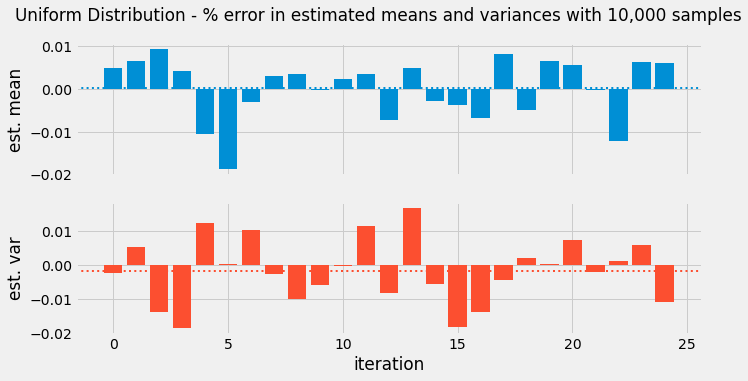

In [42]:
# Make plot

fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=False, figsize=(10,5))
fig.suptitle('Uniform Distribution - % error in estimated means and variances with 10,000 samples')

x = np.arange(25)

ax = axes[0]
ax.bar(x, sample_mean_errs)
ax.set_ylabel('est. mean')
ax.axhline(y=sample_mean_errs.mean(), ls=':', lw=2, color=COLORS[0])

ax = axes[1]
ax.bar(x, sample_var_errs, color=COLORS[1])
ax.axhline(y=sample_var_errs.mean(), ls=':', lw=2, color=COLORS[1])
ax.set_xlabel('iteration')
ax.set_ylabel('est. var')

plt.show()

### 1.2 Random variables - Gaussian PDF

Now we will repeat much of 1.1 with the normal distribution. The normal distribution $\mathcal{N}(0,\sigma^2)$ is given by
$$
f_x (\alpha) = \frac{1}{\sqrt{2 \pi \sigma_x^2}} \mathrm{exp} \bigg( {- \frac{(\alpha - \mu_x)^2}{2 \sigma_x^2}} \bigg) \quad ,
$$
where $\mu_x$ is the mean and $\sigma_x^2$ is the variance. In the following we will let $\mu_x = 0$ and $\sigma_x^2 = 1$ -- that is; $f_x (\alpha) \sim \mathcal{N}(0,\sigma^2)$.

Again, to see how these statistical properties can be calculated from randomly drawn samples, we will begin by collecting a some thousand samples in a vector, and compare the estimated mean and variance with the theoretical values:

In [43]:
# Generate N samples from the normal distribution with mean=0, std=1:
arr = np.random.randn(N)

In [44]:
# Extract the sample mean and variance
sample_mean = arr.mean()
sample_var = arr.var()
sample_var_err = abs(1 - sample_var)/(1)*100
print(fr"sample mean = {sample_mean:.5f}")
print(fr"sample variance = {sample_var:.5f} (err = {sample_var_err:.2}%)")

sample mean = 0.00209
sample variance = 1.01718 (err = 1.7%)


In [45]:
# Extract the histogram and normalize the bin counts to 1
counts, bin_edges = np.histogram(arr, bins=bins)
counts = counts/N*bins

As for the uniform distribution we will plot the estimated (discrete) PDF by drawing a line between the count number $f_x [\alpha]$ for each bin, and we can calculate the CDF by rectangular integration over the sequence $f_x [\alpha]$  with step size $\Delta \alpha = 1/100$:

In [46]:
# Numerical integration:
s = np.sum(counts*(1/bins))
print(f"Numerical integration over estimated PDF: s = {s:.5f}")

Numerical integration over estimated PDF: s = 1.00000


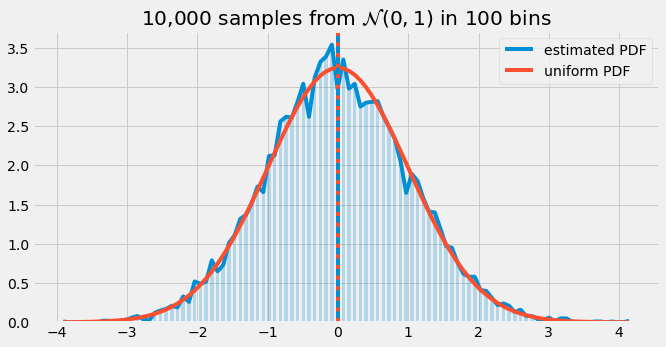

In [47]:
# Make plot

plt.figure(figsize=(10,5))
plt.title(r'10,000 samples from $\mathcal{N}(0,1)$ in 100 bins')
x = bin_centers(bin_edges)
mean, std = arr.mean(), arr.std()

plt.bar(x, counts, align='center', width=.05, alpha=.25, color=COLORS[0])
plt.plot(x, counts)
plt.plot(x, scaled_norm(bin_edges, 0, 1))
plt.axvline(x=mean, color=COLORS[0])
plt.axvline(x=0, ls=':', color=COLORS[1])
plt.legend(['estimated PDF','uniform PDF'])
plt.show()

### 1.2 The Central Limit Theorem

We begin by drawing ```N``` new ```arr```s and collect the calculated mean and variance of each in two arrays:

In [48]:
# Repeating the experiment N times
arrs = np.random.rand(12,N)
sample_mean = arrs.mean(axis=0)
sample_var = arrs.var(axis=0)

Then, we plot a histogram of the resulting means and variances and draw a line between the tops, as we did above. As we see, the estimated mean and variances are normal distributed, which is espected according to the Central Limit Theorem.

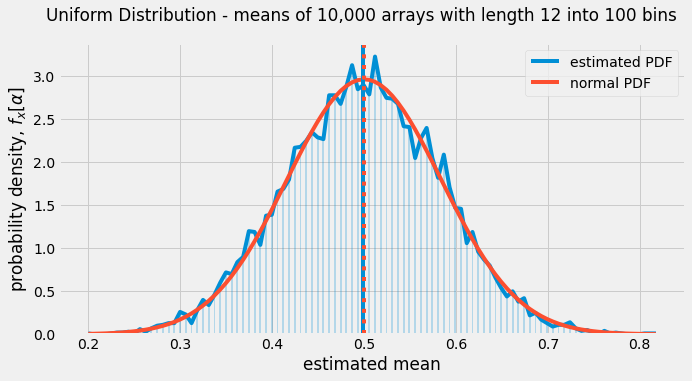

In [49]:
# Make plot

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=False, sharey=False, figsize=(10,5))
fig.suptitle('Uniform Distribution - means of 10,000 arrays with length 12 into 100 bins')

ax = axes
counts, bin_edges = np.histogram(sample_mean, bins=bins)
counts = counts/N*bins
x = bin_centers(bin_edges)
mean, std = sample_mean.mean(), sample_mean.std()

ax.bar(x, counts, align='center', width=.002, alpha=.25, color=COLORS[0])
ax.plot(x, counts)
ax.plot(x, scaled_norm(bin_edges, 1/2, std))
ax.axvline(x=mean, color=COLORS[0])
ax.axvline(x=1/2, ls=':', color=COLORS[1])
ax.set_xlabel('estimated mean')
ax.set_ylabel(r'probability density, $f_x[\alpha]$')
ax.legend(['estimated PDF','normal PDF'])

plt.show()

As before we check that the numerical integration over the histogram sums up to 1:

In [50]:
# Numerical integration results:
s = np.sum(counts*(1/bins))
print(f"Numerical integration over estimated PDF: s = {s:.5f}")

Numerical integration over estimated PDF: s = 1.00000


## Assignment 2 - Stationarity and Ergodicity

In [51]:
# Defining some functions for generating time series

# Random prodcess 1
def rp1(M, N):
    a = .02
    b = 5
    Mc = b*np.ones((M,1))*np.sin(np.arange(1,N+1)*np.pi/N)
    Ac = a*np.ones((M,1))*np.arange(1,N+1)
    v = (np.random.rand(M,N) - .5)*Mc + Ac
    return v

# Random process 2
def rp2(M, N):
    Ar = np.random.rand(M,1)*np.ones((1,N))
    Mr = np.random.rand(M,1)*np.ones((1,N))
    v = (np.random.rand(M,N) - .5)*Mr + Ar
    return v

# Random process 3
def rp3(M, N):
    a = .5
    m = 3
    v = (np.random.rand(M,N) - .5)*m + a
    return v

### 2.1 Stationary or Ergodic?

We will decide by inspection whether the three random processes defined in ```rp1()```, ```rp2()```, ```rp3()``` are stationary and/or ergodic. Very quickly, let's recount the meaning of each term (as defined (loosely) by Wikipedia...)
* Stationarity: *A stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequensely, parameters such as mean and variance also do not change over time*
* Ergodicity: *[...] a stochastic process is said to be ergodic if its statistical properties can be deduced from a single, sufficiently long, random sample of the process*

To decide whether a process has these properties, we will look for
* *Periodicity* to rule out stationarity
* Periodicity plus differences in *offset* and *amplitude* between realizations to rule out ergodicity

We begin by generating some time series...

In [63]:
# Generating M realizations with length N of each random process
M, N = 4, 100
p1 = rp1(M, N)
p2 = rp2(M, N)
p3 = rp3(M, N)

... and then we plot each of them in its own frame:

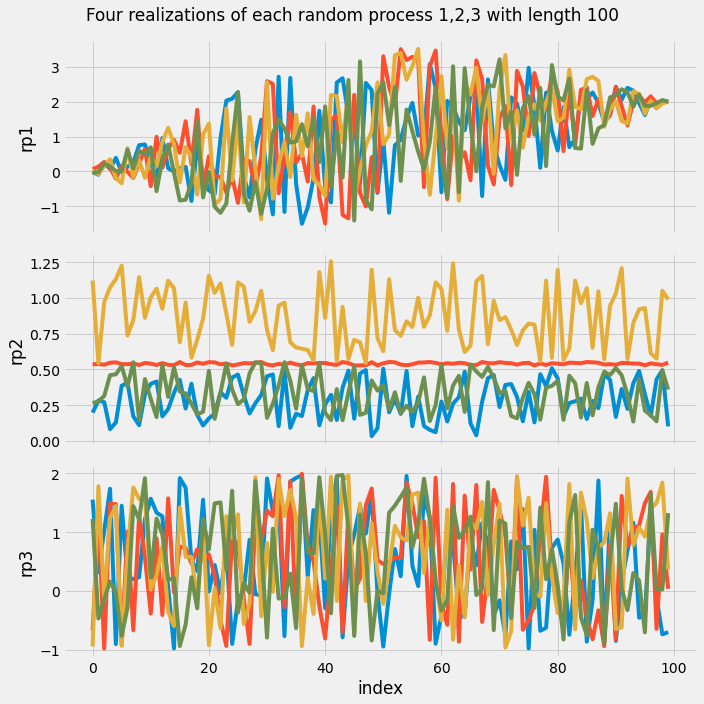

In [64]:
# Make plot

fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(10,10))
fig.suptitle('Four realizations of each random process 1,2,3 with length 100')

for i, (process, process_name) in enumerate(zip((p1, p2, p3), ('rp1', 'rp2', 'rp3'))):
    ax = axes[i]
    for j in range(4):
        ax.plot(process[j])
        ax.set_ylabel(process_name)

ax.set_xlabel('index')
plt.tight_layout()
plt.show()

We see that 
* ```rp1()``` is very clearly is non-stationary and hence non-ergodic due to its strong periodicity and upwards trend
* ```rp2()``` has no obvoius trend or period and hence is assumed to be stationary; the amplitudes and offsets are different between the relizations, however, which makes the process non-ergodic
* ```rp3()``` has neither trend nor pertiod, and the offsets and amplitudes seem not to differ between the realizarions. This process is assumed to be both stationary and ergodic

### 2.2 Ensemble Averages

We will now investigate the time-dependent statistics of the ensemble averages for each random process ```rp1()```, ```rp2()```, ```rp3()```. We begin by generating 80 realizations of each process and avarage over the ensemble to create a single series as representation of each process.

In [67]:
# Generating M realizations with length N of each random process
M, N = 80, 100
p1 = rp1(M, N)
p2 = rp2(M, N)
p3 = rp3(M, N)

Then we calculate the mean and variance for each ensemble and plot them:

In [69]:
# Calculate ensemble means and standard deviations
p1_mean, p1_std = p1.mean(axis=0), p1.std(axis=0)
p2_mean, p2_std = p2.mean(axis=0), p2.std(axis=0)
p3_mean, p3_std = p3.mean(axis=0), p3.std(axis=0)

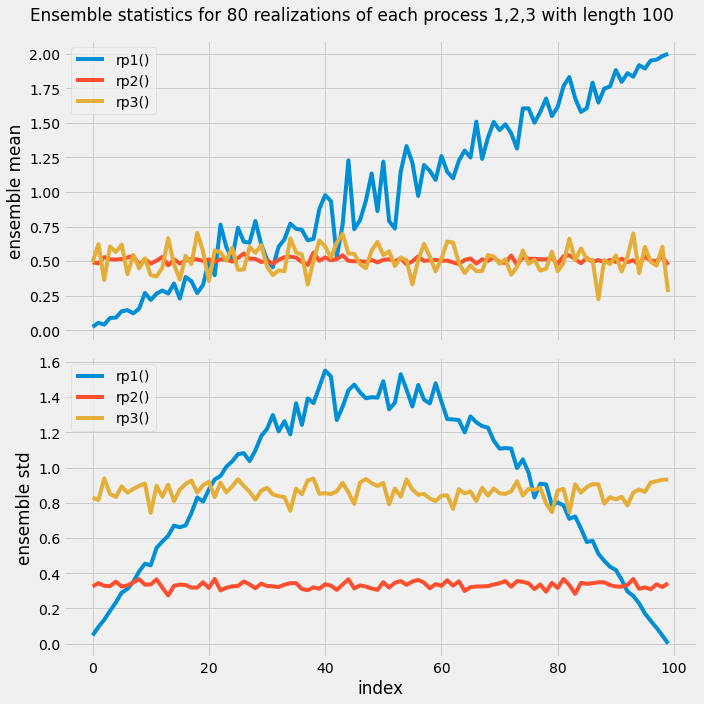

In [81]:
# Make plot

means = (p1_mean, p2_mean, p3_mean)
stds = (p1_std, p2_std, p3_std)
names = ('rp1()', 'rp2()', 'rp3()')

fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=False, figsize=(10,10))
fig.suptitle('Ensemble statistics for 80 realizations of each process 1,2,3 with length 100')

ax = axes[0]
for process in means:
    ax.plot(process)
ax.legend(names, loc='upper left')
ax.set_ylabel('ensemble mean')

ax = axes[1]
for process in stds:
    ax.plot(process)
ax.legend(names, loc='upper left')
ax.set_ylabel('ensemble std')


ax.set_xlabel('index')
plt.tight_layout()
plt.show()

We see that ```rp1()``` clearly is not stationary, but that the two other processes are. The ensemble plots cannot rule out ergodicity, however. For that we will need to analyze at the time-averages of each realization and their relationship with the ensemble averages, as we will do below.

### 2.3 Time Averages

To decide whether a process is ergodic we must study an ensemble of realizations. In 2.2 we saw that ```rp2()``` and ```rp3()``` both exhibited fairly constant statistical properties in the ensemble mean, making both of them stationary and candidates for ergodicity. To support our assumptions from 2.1 that only ```rp3()``` fulfills the criteria, we will take the time-average of a number of realizations of each process and plot them to see how they vary.

We begin by generating some time series...

In [82]:
# Generating M realizations with length N of each random process
M, N = 4, 100
p1 = rp1(M, N)
p2 = rp2(M, N)
p3 = rp3(M, N)

... then we take the mean and plot them:

In [90]:
# Calculate time-averages
p1_mean = p1.mean(axis=1)
p2_mean = p2.mean(axis=1)
p3_mean = p3.mean(axis=1)

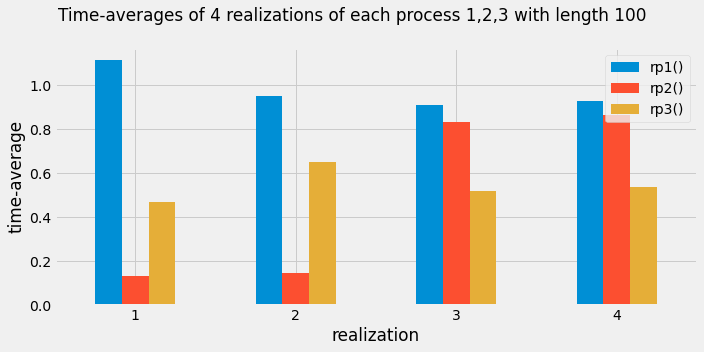

In [108]:
# Make plot

means = (p1_mean, p2_mean, p3_mean)
names = ('rp1()', 'rp2()', 'rp3()')

df = DataFrame(columns=names, data=np.vstack(means).T)
df['x'] = [str(i) for i in range(1,M+1)]

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=False, figsize=(10,5))
fig.suptitle('Time-averages of 4 realizations of each process 1,2,3 with length 100')

ax = axes
df.plot(x='x', ax=ax, kind='bar', rot=0)
ax.set_xlabel('realization')
ax.set_ylabel('time-average')

plt.tight_layout()
plt.show()

From this we see that the time-averages of ```rp1()``` and ```rp3()``` both vary little, but ```rp1()``` has already been ruled out due to its periodicity. ```rp2()``` as we see has a max/min ratio of more than 5. In conclusion; only ```rp3()``` is ergodic.